Assignment 2:
    
Marwan Abdelmagid, 900211676

In [ ]:
Abstarct 
Part 1: compare nations probility of wining friendly home matches, offical home matches, and imoportant home matches.

Data description

1: calculation of the probability of wining friendly matches in  neutral stadiums and home stadiums. 

2: calculation of the probability of wining official matches in  neutral stadiums and home stadiums.

3: calculation of the probability of wining official matches in  neutral stadiums and home stadiums.

4: conclusion

Part2: comparing the daily infections, deaths and fatality rate across diffrent critaries comparing between 2020 and 2021

Data description

5: Comparison between daily death infections, daily deaths, and fatality rate between 2020 and 2021.

6: Comparison between daily death infections, daily deaths, and fatality rate between the 7 regions.

7: Comparison between daily death infections, daily deaths, and fatality rate between the 7 continents.

8: Comparison between daily death infections, daily deaths, and fatality rate between countries with diffrent income levels 





"Results" data describition:

date: date match was played on.

home_team, away_team: home team and away team respectively.

home_score,away_score: home teams score and away team score respectively.

tournament: type of toutnament match was played in.

city,country: city and country match was played in.

neutral: True if the match is played on ground that does not belong to home or away team.

result_home,result_away: win, lose or draw for the home team or away team respectively.




"Covid data" data describition:

date: date of which data was collected.

iso3c: country code. 

income: country income level.

region: which region does country belong to.

continent: which contient is the country on.

dcases: number of cases reported on that day.

ddeaths: number of deaths reported on that day.

population: popoulation of country.

weekdays: which month was these numbers reoprted in.

month: which month was these numbers reoprted in.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportion_confint
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats 
from pandas.api.types import CategoricalDtype
from scipy.stats import norm,t

Part 1:

In [284]:
df=pd.read_csv("results.csv")

In [285]:
df.head()
df.shape

(43188, 9)

In [286]:
df.loc[df['home_team'] == df['country'], 'home_match'] = True
df.loc[df['home_team'] != df['country'], 'home_match'] = False

In [287]:
df.loc[df['home_match'] == True, 'away_match'] = False
df.loc[df['home_match']==False,'away_match']= True
df.loc[df['neutral']==True, 'away_match'] = False

In [288]:
x=df["home_score"] - df["away_score"]

In [289]:
conditions=[(x<0),(x>0),(x==0)]
values=["lose","win","draw"]

In [290]:
df["result_home"]=np.select(conditions,values)

In [291]:
condition1=[(x>0),(x<0),(x==0)]
value1=["lose","win","draw"]

In [292]:
df["result_away"]=np.select(condition1,value1)
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_match,away_match,result_home,result_away
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,True,False,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,True,False,win,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,True,False,win,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,True,False,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,True,False,win,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,True,False,win,lose
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,False,False,lose,win
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,True,False,draw,draw
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,True,False,draw,draw


1: Friendly matches 

1.1: probility of wining home games 

In [293]:
df_f=df[df["tournament"]=="Friendly"]
df_homegame=df_f[df_f["home_match"]==True]
df_homegame

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_match,away_match,result_home,result_away
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,True,False,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,True,False,win,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,True,False,win,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,True,False,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,True,False,win,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43179,2/1/2022,Bahrain,DR Congo,1,0,Friendly,Riffa,Bahrain,False,True,False,win,lose
43180,2/1/2022,Kuwait,Libya,0,2,Friendly,Kuwait City,Kuwait,False,True,False,lose,win
43181,2/1/2022,Nepal,Mauritius,1,0,Friendly,Kathmandu,Nepal,False,True,False,win,lose
43182,2/1/2022,Nicaragua,Belize,1,1,Friendly,Managua,Nicaragua,False,True,False,draw,draw


In [294]:
df_francehome=df_homegame[df_homegame["country"]=="France"]
df_francehome.shape

(292, 13)

In [295]:
a=np.array(df_francehome["result_home"].value_counts())
a1=a.sum()

In [296]:
CI_france=proportion_confint(count=a[0],nobs=a1,alpha=(1-.95))
CI_france

(0.4632472850239812, 0.5778486053869777)

In [297]:
df_englandhome=df_homegame[df_homegame["country"]=="England"]
df_englandhome.shape

(193, 13)

In [298]:
b=np.array(df_englandhome["result_home"].value_counts())
b1=b.sum()

In [299]:
CI_england=proportion_confint(count=b[0],nobs=b1,alpha=(1-.95))
CI_england
(0.6272415832438014, 0.7380720698927299)

(0.6272415832438014, 0.7380720698927299)

In [300]:
df_italyhome=df_homegame[df_homegame["country"]=="Italy"]
df_italyhome.shape

(212, 13)

In [301]:
c=np.array(df_italyhome["result_home"].value_counts())
c1=c.sum()

In [302]:
CI_italy=proportion_confint(count=c[0],nobs=c1,alpha=(1-.95))
CI_italy

(0.5622730774546754, 0.6924439036774002)

In [38]:
df_germanyhome=df_homegame[df_homegame["country"]=="Germany"]
df_germanyhome.shape

(429, 13)

In [39]:
d=np.array(df_germanyhome["result_home"].value_counts())
d1=d.sum()

In [40]:
CI_germany=proportion_confint(count=d[0],nobs=d1,alpha=(1-.95))
CI_germany

(0.5836678515881967, 0.6750734071530621)

In [41]:
df_spainhome=df_homegame[df_homegame["country"]=="Spain"]

In [42]:
e=np.array(df_spainhome["result_home"].value_counts())
e1=e.sum()

In [43]:
CI_spain=proportion_confint(count=e[0],nobs=e1,alpha=(1-.95))
CI_spain

(0.6498844681357391, 0.7507464466907593)

In [46]:
CI_home={}
CI_home["country"]=["England","France","Germany","Italy","Spain"]
CI_home["lb"]=[CI_england[0],CI_france[0],CI_germany[0],CI_italy[0],CI_spain[0]]
CI_home["ub"]=[CI_england[1],CI_france[1],CI_germany[1],CI_italy[1],CI_spain[1]]
df_CIhome=pd.DataFrame(CI_home)

([<matplotlib.axis.YTick at 0x2328f3d1be0>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

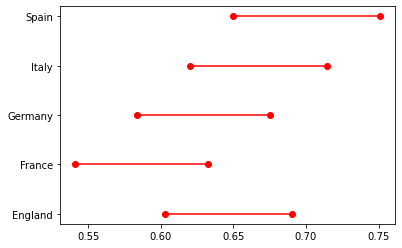

In [60]:
for lb,ub,y in zip(df_CIhome['lb'],df_CIhome['ub'],range(len(df_CIhome))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIhome)),list(df_CIhome['country']))

There is no signifcant diffrence between the countries chances of wining home matches, 
with all 5 countries have a higher than 50 precent chance of wining home matches. 
Spain has the highes probility of wining, and France has the lowest

1.2: probility of losing home games

In [61]:
CI_francel=proportion_confint(count=a[1],nobs=a1,alpha=(1-.95))
CI_francel

(0.17411643713822142, 0.2502627953674219)

In [62]:
CI_englandl=proportion_confint(count=b[1],nobs=b1,alpha=(1-.95))
CI_englandl

(0.18012455987106055, 0.2552202677151464)

In [63]:
CI_italyl=proportion_confint(count=c[1],nobs=c1,alpha=(1-.95))
CI_italyl

(0.20288031354554617, 0.28926628331309256)

In [64]:
CI_germanyl=proportion_confint(count=d[1],nobs=d1,alpha=(1-.95))
CI_germanyl

(0.16691788481812214, 0.2433385254382881)

In [65]:
CI_spainl=proportion_confint(count=e[1],nobs=e1,alpha=(1-.95))
CI_spainl

(0.14040319686664388, 0.2255274025024413)

In [73]:
CI_homel={}
CI_homel["country"]=["England","France","Germany","Italy","Spain"]
CI_homel["lb"]=[CI_englandl[0],CI_francel[0],CI_germanyl[0],CI_italyl[0],CI_spainl[0]]
CI_homel["ub"]=[CI_englandl[1],CI_francel[1],CI_germanyl[1],CI_italyl[1],CI_spainl[1]]
df_CIhomel=pd.DataFrame(CI_homel)
df_CIhomel

,country,lb,ub
0,England,0.180125,0.255220
1,France,0.174116,0.250263
2,Germany,0.166918,0.243339
3,Italy,0.202880,0.289266
4,Spain,0.140403,0.225527


([<matplotlib.axis.YTick at 0x2328fc62c70>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

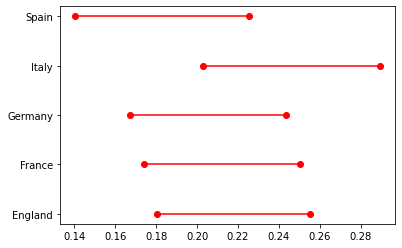

In [74]:
for lb,ub,y in zip(df_CIhomel['lb'],df_CIhomel['ub'],range(len(df_CIhomel))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIhomel)),list(df_CIhomel['country']))

As seen in the graph all of the countries have a low probiblity of losing home matches, with spain having the lowest probility of losing. There is no signifcant diffrence between the countries, and italy having the highest probility of lose.

1.3: probility of wining matches on neutral ground

In [99]:
df_f=df[df["tournament"]=="Friendly"]
df_neutral=df_f[df_f["neutral"]==True]
df_neutral

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_match,away_match,result_home,result_away
267,5/29/1910,Chile,Uruguay,0,3,Friendly,Buenos Aires,Argentina,True,False,False,lose,win
331,6/30/1912,Austria,Italy,5,1,Friendly,Stockholm,Sweden,True,False,False,win,lose
332,7/1/1912,Austria,Norway,1,1,Friendly,Stockholm,Sweden,True,False,False,draw,draw
333,7/3/1912,Hungary,Austria,3,0,Friendly,Stockholm,Sweden,True,False,False,win,lose
334,7/3/1912,Norway,Russia,2,1,Friendly,Stockholm,Sweden,True,False,False,win,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43135,1/16/2022,Colombia,Honduras,2,1,Friendly,Fort Lauderdale,United States,True,False,False,win,lose
43143,1/18/2022,Moldova,Uganda,2,3,Friendly,Belek,Turkey,True,False,False,lose,win
43150,1/20/2022,South Korea,Moldova,4,0,Friendly,Antalya,Turkey,True,False,False,win,lose
43168,1/27/2022,Uzbekistan,South Sudan,3,0,Friendly,Dubai,United Arab Emirates,True,False,False,win,lose


In [100]:
df_franceneu=df_neutral[df_neutral["country"]=="France"]
df_franceneu.shape

(162, 13)

In [101]:
a=np.array(df_franceneu["result_home"].value_counts())
a1=a.sum()


In [102]:
CI_france=proportion_confint(count=a[0],nobs=a1,alpha=(1-.95))
CI_france

(0.3437565232589405, 0.4957496495805656)

In [103]:
df_englandneu=df_neutral[df_neutral["country"]=="England"]
df_englandneu.shape


(77, 13)

In [104]:
b=np.array(df_englandneu["result_home"].value_counts())
b1=b.sum()

In [105]:
CI_england=proportion_confint(count=b[0],nobs=b1,alpha=(1-.95))
CI_england

(0.31803757494100876, 0.5391052822018484)

In [106]:
df_italyneu=df_neutral[df_neutral["country"]=="Italy"]
df_italyneu.shape

(20, 13)

In [107]:
c=np.array(df_italyneu["result_home"].value_counts())
c1=c.sum()


In [108]:
CI_italy=proportion_confint(count=c[0],nobs=c1,alpha=(1-.95))
CI_italy

(0.18529670275394117, 0.6147032972460589)

In [109]:
df_germanyneu=df_neutral[df_neutral["country"]=="Germany"]

In [110]:
d=np.array(df_germanyneu["result_home"].value_counts())
d1=d.sum()

In [111]:
CI_germany=proportion_confint(count=d[0],nobs=d1,alpha=(1-.95))
CI_germany

(0.27115231267547785, 0.5660569896501035)

In [112]:
df_spainneu=df_neutral[df_neutral["country"]=="Spain"]


In [113]:
e=np.array(df_spainneu["result_home"].value_counts())
e1=e.sum()

In [114]:
CI_spain=proportion_confint(count=e[0],nobs=e1,alpha=(1-.95))
CI_spain

(0.28641917703539904, 0.5332529541121419)

In [115]:
CI_neu={}
CI_neu["country"]=["England","France","Germany","Italy","Spain"]
CI_neu["lb"]=[CI_england[0],CI_france[0],CI_germany[0],CI_italy[0],CI_spain[0]]
CI_neu["ub"]=[CI_england[1],CI_france[1],CI_germany[1],CI_italy[1],CI_spain[1]]
df_CIneu=pd.DataFrame(CI_neu)

([<matplotlib.axis.YTick at 0x23290459d60>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

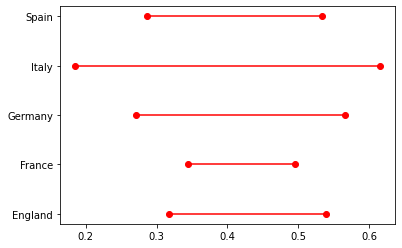

In [134]:
for lb,ub,y in zip(df_CIneu['lb'],df_CIneu['ub'],range(len(df_CIneu))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIneu)),list(df_CIneu['country']))

All four countries have almost equal probilities of wining gmaes on neutral ground, with the exception of italy which has a higher variance in its results in both the upper and lower results.

1.4: probility of losing fiendly matches on neutral stadiums

In [122]:
CI_francel=proportion_confint(count=a[1],nobs=a1,alpha=(1-.95))
CI_francel

(0.2375092279597225, 0.3797747226575614)

In [123]:
CI_englandl=proportion_confint(count=b[1],nobs=b1,alpha=(1-.95))
CI_englandl


(0.1848111440453603, 0.3866174273832111)

In [124]:

CI_italyl=proportion_confint(count=c[1],nobs=c1,alpha=(1-.95))
CI_italyl

(0.09916345547364067, 0.5008365445263593)

In [125]:
CI_germanyl=proportion_confint(count=d[1],nobs=d1,alpha=(1-.95))
CI_germanyl

(0.16505492475188838, 0.43959623803880926)

In [126]:
CI_spainl=proportion_confint(count=e[1],nobs=e1,alpha=(1-.95))
CI_spainl

(0.25542804455024765, 0.49867031610549)

In [132]:
CI_neul={}
CI_neul["country"]=["England","France","Germany","Italy","Spain"]
CI_neul["lb"]=[CI_englandl[0],CI_francel[0],CI_germanyl[0],CI_italyl[0],CI_spainl[0]]
CI_neul["ub"]=[CI_englandl[1],CI_francel[1],CI_germanyl[1],CI_italyl[1],CI_spainl[1]]
df_CIneul=pd.DataFrame(CI_neul)

([<matplotlib.axis.YTick at 0x2329028d2e0>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

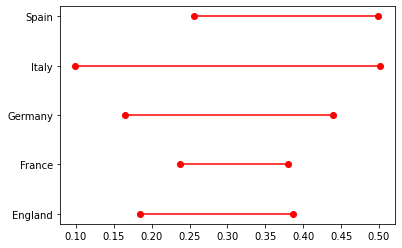

In [133]:
for lb,ub,y in zip(df_CIneul['lb'],df_CIneul['ub'],range(len(df_CIneul))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIneul)),list(df_CIneul['country']))

The four of of england,germanym spain and france, have a similar probility of losing,with the eralier three having a lower variance in their probilibty, Italy has a large variance in its results. THere is no signifcant diffrence between their probibilty of losing

Spain: spain has a higher probibility of wining friendly matches on home ground than one neutral ground, and a smaller probility of wining friendly matches in neutral stadiums, showing that they are affected by wither it is a home match or not

Italy: italy has a higher probibliyt of wining friendly matches at home and a lower prbibility of losing at neutral games , showng that the team preforemones better at home game 

Germany: germany has a similar probibility of wining and losing frinedly matches played on neutral or hoem stadiums, showing they are not affected by where the match is played 

France: france has a higher probibility of wining friendly matches in home stadiums than one neutral ground, and a smaller probility of losing friendly matches on neutral stadiums, showing that they are affected by wither it is a home match or not

England: england has a lower probility of wining firendly matches if they are played on neutral ground than in their home stadium, showing that they are affected by wither it is a home match or not

2: Playing offical matches 

2.1: wining home games

In [142]:
df_o=df[df["tournament"]!="Friendly"]
df_homegame=df_o[df_o["home_match"]==True]
df_homegame.shape

(17225, 13)

In [143]:
df_francehomeo=df_homegame[df_homegame["country"]=="France"]
df_francehomeo.shape

(292, 13)

In [144]:
a=np.array(df_francehomeo["result_home"].value_counts())
a1=a.sum()

In [145]:
CI_franceo=proportion_confint(count=a[0],nobs=a1,alpha=(1-.95))
CI_franceo


(0.4632472850239812, 0.5778486053869777)

In [146]:
df_englandhomeo=df_homegame[df_homegame["country"]=="England"]
df_englandhomeo.shape

(193, 13)

In [147]:
b=np.array(df_englandhomeo["result_home"].value_counts())
b1=b.sum()

In [148]:
CI_englando=proportion_confint(count=b[0],nobs=b1,alpha=(1-.95))
CI_englando

(0.5266226877554671, 0.6650871568041185)

In [149]:
df_italyhomeo=df_homegame[df_homegame["country"]=="Italy"]
df_italyhomeo.shape

(212, 13)

In [150]:
c=np.array(df_italyhomeo["result_home"].value_counts())
c1=c.sum()

In [151]:
CI_italyo=proportion_confint(count=c[0],nobs=c1,alpha=(1-.95))
CI_italyo

(0.5622730774546754, 0.6924439036774002)

In [152]:
df_germanyhomeo=df_homegame[df_homegame["country"]=="Germany"]
df_germanyhomeo.shape


(293, 13)

In [153]:
d=np.array(df_germanyhomeo["result_home"].value_counts())
d1=d.sum()

In [154]:
CI_germanyo=proportion_confint(count=d[0],nobs=d1,alpha=(1-.95))
CI_germanyo

(0.523694990302764, 0.6367145660112291)

In [155]:
df_spainhomeo=df_homegame[df_homegame["country"]=="Spain"]

In [156]:
e=np.array(df_spainhomeo["result_home"].value_counts())
e1=e.sum()

In [157]:
CI_spaino=proportion_confint(count=e[0],nobs=e1,alpha=(1-.95))
CI_spaino

(0.5490092941741966, 0.6912141695129541)

In [158]:
CI_homeo={}
CI_homeo["country"]=["England","France","Germany","Italy","Spain"]
CI_homeo["lb"]=[CI_englando[0],CI_franceo[0],CI_germanyo[0],CI_italyo[0],CI_spaino[0]]
CI_homeo["ub"]=[CI_englando[1],CI_franceo[1],CI_germanyo[1],CI_italyo[1],CI_spaino[1]]
df_CIhomeo=pd.DataFrame(CI_homeo)

([<matplotlib.axis.YTick at 0x232905fd670>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

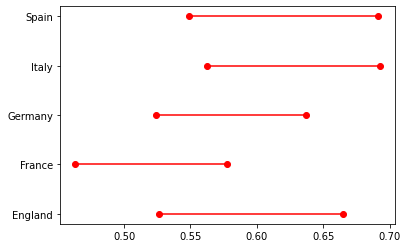

In [159]:
for lb,ub,y in zip(df_CIhomeo['lb'],df_CIhomeo['ub'],range(len(df_CIhomeo))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIhomeo)),list(df_CIhomeo['country']))

Almost all five countries have equal probilitt of wining official games at home stadium, with france having the lowest probility of the five.

2.2:losing in home stadium

In [160]:
CI_franceol=proportion_confint(count=a[1],nobs=a1,alpha=(1-.95))
CI_franceol

(0.21637422773763815, 0.31787234760482763)

In [161]:
CI_englandol=proportion_confint(count=b[1],nobs=b1,alpha=(1-.95))
CI_englandol

(0.18297006230998059, 0.30407656981437176)

In [162]:
CI_italyol=proportion_confint(count=c[1],nobs=c1,alpha=(1-.95))
CI_italyol

(0.19606675066590884, 0.3133672115982421)

In [163]:
CI_germanyol=proportion_confint(count=d[1],nobs=d1,alpha=(1-.95))
CI_germanyol

(0.16797559824042385, 0.2620585314524089)

In [164]:
CI_spainol=proportion_confint(count=e[1],nobs=e1,alpha=(1-.95))
CI_spainol

(0.15238456113798096, 0.2721964444486112)

In [165]:
CI_homeol={}
CI_homeol["country"]=["England","France","Germany","Italy","Spain"]
CI_homeol["lb"]=[CI_englandol[0],CI_franceol[0],CI_germanyol[0],CI_italyol[0],CI_spainol[0]]
CI_homeol["ub"]=[CI_englandol[1],CI_franceol[1],CI_germanyol[1],CI_italyol[1],CI_spainol[1]]
df_CIhomeol=pd.DataFrame(CI_homeol)

,country,lb,ub
0,England,0.182970,0.304077
1,France,0.216374,0.317872
2,Germany,0.167976,0.262059
3,Italy,0.196067,0.313367
4,Spain,0.152385,0.272196


([<matplotlib.axis.YTick at 0x2328f49a0d0>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

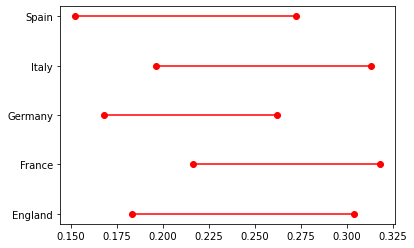

In [166]:
for lb,ub,y in zip(df_CIhomeol['lb'],df_CIhomeol['ub'],range(len(df_CIhomeol))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIhomeol)),list(df_CIhomeol['country']))

ALl five countires have equal probobility of losing offical matches in home stadiums.

2.3: wining on neutral ground

In [191]:
df_o=df[df["tournament"]!="Friendly"]
df_neutral=df_o[df_o["neutral"]==True]

In [192]:
df_franceneuo=df_neutral[df_neutral["country"]=="France"]

In [193]:
a=np.array(df_franceneuo["result_home"].value_counts())
a1=a.sum()

In [194]:
CI_franceo=proportion_confint(count=a[0],nobs=a1,alpha=(1-.95))
CI_franceo

(0.34813092544065977, 0.48692062095109284)

In [195]:
df_englandneuo=df_neutral[df_neutral["country"]=="England"]

In [196]:
b=np.array(df_englandneuo["result_home"].value_counts())
b1=b.sum()

In [197]:
CI_englando=proportion_confint(count=b[0],nobs=b1,alpha=(1-.95))
CI_englando

(0.3647474741499174, 0.5288695471266783)

In [198]:
df_italyneuo=df_neutral[df_neutral["country"]=="Italy"]
df_italyneuo.shape

(96, 13)

In [199]:
c=np.array(df_italyneuo["result_home"].value_counts())
c1=c.sum()

In [200]:
CI_italyo=proportion_confint(count=c[0],nobs=c1,alpha=(1-.95))
CI_italyo

(0.3080048833111753, 0.5044951166888246)

In [201]:
df_germanyneuo=df_neutral[df_neutral["country"]=="Germany"]

In [202]:
d=np.array(df_germanyneuo["result_home"].value_counts())
d1=d.sum()

In [203]:
CI_germanyo=proportion_confint(count=d[0],nobs=d1,alpha=(1-.95))
CI_germanyo

(0.34216314039440565, 0.5149797167484514)

In [303]:
df_spainneuo=df_neutral[df_neutral["country"]=="Spain"]

(66, 13)

In [205]:
e=np.array(df_spainneuo["result_home"].value_counts())
e1=e.sum()

In [206]:
CI_spaino=proportion_confint(count=e[0],nobs=e1,alpha=(1-.95))
CI_spaino

(0.27605702429421597, 0.5118217635845719)

In [207]:
CI_neuo={}
CI_neuo["country"]=["England","France","Germany","Italy","Spain"]
CI_neuo["lb"]=[CI_englando[0],CI_franceo[0],CI_germanyo[0],CI_italyo[0],CI_spaino[0]]
CI_neuo["ub"]=[CI_englando[1],CI_franceo[1],CI_germanyo[1],CI_italyo[1],CI_spaino[1]]
df_CIneuo=pd.DataFrame(CI_neuo)

([<matplotlib.axis.YTick at 0x23292357a00>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

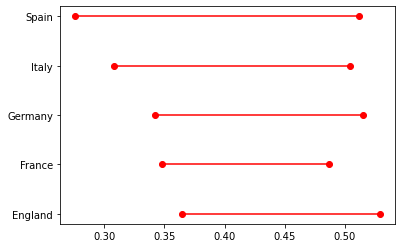

In [208]:
for lb,ub,y in zip(df_CIneuo['lb'],df_CIneuo['ub'],range(len(df_CIneuo))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIneuo)),list(df_CIneuo['country']))

All five have equal probility of losing offical matches in home stadiums, with spain having the largest v=range in its probability 

2.4: losing on neutral ground

In [209]:
CI_francelo=proportion_confint(count=a[1],nobs=a1,alpha=(1-.95))
CI_francelo

(0.2588474263915707, 0.39063710969090354)

In [210]:
CI_englandlo=proportion_confint(count=b[1],nobs=b1,alpha=(1-.95))
CI_englandlo

(0.2689197521097339, 0.4261157088831739)

In [211]:
CI_italylo=proportion_confint(count=c[1],nobs=c1,alpha=(1-.95))
CI_italylo

(0.3080048833111753, 0.5044951166888246)

In [212]:
CI_germanylo=proportion_confint(count=d[1],nobs=d1,alpha=(1-.95))
CI_germanylo

(0.2510225828295837, 0.41564408383708296)

In [215]:
CI_spainlo=proportion_confint(count=e[1],nobs=e1,alpha=(1-.95))
CI_spainlo

(0.2335291952906477, 0.4634405016790493)

In [216]:
CI_neulo={}
CI_neulo["country"]=["England","France","Germany","Italy","Spain"]
CI_neulo["lb"]=[CI_englandlo[0],CI_francelo[0],CI_germanylo[0],CI_italylo[0],CI_spainlo[0]]
CI_neulo["ub"]=[CI_englandlo[1],CI_francelo[1],CI_germanylo[1],CI_italylo[1],CI_spainlo[1]]
df_CIneulo=pd.DataFrame(CI_neulo)

([<matplotlib.axis.YTick at 0x232923c3f70>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

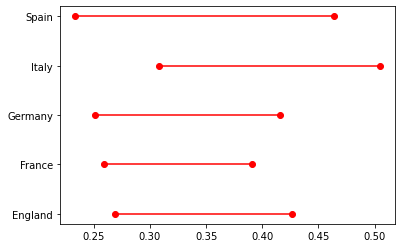

In [217]:
for lb,ub,y in zip(df_CIneulo['lb'],df_CIneulo['ub'],range(len(df_CIneulo))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIneulo)),list(df_CIneulo['country']))

Spain: has a higher probibilty of wining official matches if they are played at home, when compared to playing offical matches at neutral ground. This is similar to Spaain's probiblity of wining for friendly matches showing that there is no signifacnt diffrence between spains preformence in offical and friendly matches. They perfrom better at friendly matches even though diffrence is not signifcant 

Italy: has an equal probiblity of wining and losing offical matches when playing on neutral, moreover their probility of wining friendly matches played at home is higher than that on neutral ground. This is diffrent than their probiblity of wining friendly matches where they preform worse in offical matches played on neutral ground than they do in friendly matches 

Germany: has a has a higher probibilty of wining official matches if they are played at home, when compared to playing offical matches at neutral ground. This is diffrent from their probility for friendly matches where there is a signifacnt diffrence in their preformance in neutral games for firendly and offical matches, they preform better in the friendly matches  better for friendly matches 

France: France has a higher probibilty of wining official matches if they are played at home, when compared to playing offical matches at neutral ground. This is similar to their probiblity of wining friendly matches showing that there is no signifacnt diffrence between spains preformence in offical and friendly matches.However, they perfrom better at friendly matches even though diffrence is not signifcant 

Engalnd:England has an equal probiblity of wining and losing offical matches when playing on neutral, moreover their probility of wining friendly matches played at home is higher than that on neutral ground. This is diffrent than their probiblity of wining friendly matches where they preform worse in offical matches played on neutral ground than they do in friendly matches 

In [ ]:
3: world cup qualifications matches 

3.1: wining world cup qualification matches 

In [240]:
df_quali=df[df["tournament"]=="FIFA World Cup qualification"]
df_quali.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_match,away_match,result_home,result_away
1591,6/11/1933,Sweden,Estonia,6,2,FIFA World Cup qualification,Stockholm,Sweden,False,True,False,win,lose
1596,6/29/1933,Lithuania,Sweden,0,2,FIFA World Cup qualification,Kaunas,Lithuania,False,True,False,lose,win


In [258]:
df_franceq=df_quali[df_quali["country"]=="France"]


In [259]:
a=np.array(df_franceq["result_home"].value_counts())
a1=a.sum()

In [260]:
CI_franceq=proportion_confint(count=a[0],nobs=a1,alpha=(1-.95))
CI_franceq

(0.5850838683087067, 0.81174152851669)

In [270]:
df_englandq=df_quali[df_quali["country"]=="England"]


In [271]:
b=np.array(df_englandq["result_home"].value_counts())
b1=b.sum()
b

array([48, 13,  3], dtype=int64)

In [272]:
CI_englandq=proportion_confint(count=b[0],nobs=b1,alpha=(1-.95))
CI_englandq

(0.6439138374303589, 0.8560861625696411)

In [273]:
df_italyq=df_quali[df_quali["country"]=="Italy"]


In [274]:
c=np.array(df_italyq["result_home"].value_counts())
c1=c.sum()

In [275]:
CI_italyq=proportion_confint(count=c[0],nobs=c1,alpha=(1-.95))
CI_italyq

(0.62439657000099, 0.832746287141867)

In [276]:
df_germanyq=df_quali[df_quali["country"]=="Germany"]

In [277]:
d=np.array(df_germanyq["result_home"].value_counts())
d1=d.sum()

In [278]:
CI_germanyq=proportion_confint(count=d[0],nobs=d1,alpha=(1-.95))
CI_germanyq

(0.6426394331057614, 0.8661324967188)

In [279]:
df_spainq=df_quali[df_quali["country"]=="Spain"]

In [280]:
e=np.array(df_spainq["result_home"].value_counts())
e1=e.sum()

In [281]:
CI_spainq=proportion_confint(count=e[0],nobs=e1,alpha=(1-.95))
CI_spainq

(0.6404715250145009, 0.8452427606997849)

In [282]:
CI_quali={}
CI_quali["country"]=["England","France","Germany","Italy","Spain"]
CI_quali["lb"]=[CI_englandq[0],CI_franceq[0],CI_germanyq[0],CI_italyq[0],CI_spainq[0]]
CI_quali["ub"]=[CI_englandq[1],CI_franceq[1],CI_germanyq[1],CI_italyq[1],CI_spainq[1]]
df_CIquali=pd.DataFrame(CI_quali)

([<matplotlib.axis.YTick at 0x232924e7670>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

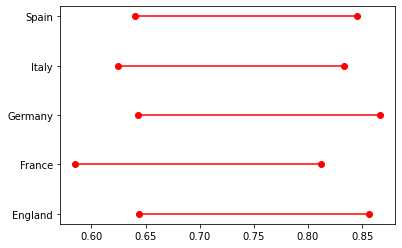

In [283]:
for lb,ub,y in zip(df_CIquali['lb'],df_CIquali['ub'],range(len(df_CIquali))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIquali)),list(df_CIquali['country']))

4. conclusion about each country:

Spain:

Italy:

Germany:

France:

Engalnd 